# This notebook trains the convolution neural network on MNIST dataset to achieve state of the art result with minimal set of parameters

In [0]:
# Uncomment and run the line below if you don't have keras and hvplot installed
# !pip install -q keras
# !pip install hvplot
# import keras

## Import the necessary packages

In [17]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt
from collections import Counter
import holoviews as hv 
from random import sample 
import random
hv.extension('matplotlib')

/usr/local/lib/python3.6/dist-packages/param/parameterized.py:2811: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  return inst.__call__(*args,**params)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## Show some meta information about the data and a sample image

There are 60000 number images in the training dataset
There are 10000 number images in the test dataset

Figure below shows, how a sample image look likes


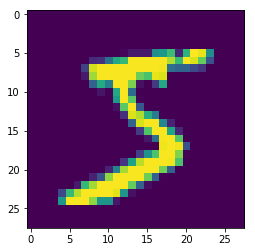

In [12]:
print("There are {} number images in the training dataset".format(X_train.shape[0]))
print("There are {} number images in the test dataset\n".format(X_test.shape[0]))
print("Figure below shows, how a sample image look likes")

# plt.plot(I,'o');
plt.imshow(X_train[0])

## Check the distribution of digits in train and test dataset. There does not see to be bias in the distribution of digits. It seems to be uniform

In [15]:
print("Distribution of digits in train data {}".format(dict(Counter(y_train))))
print("Distribution of digits in test data {}".format(dict(Counter(y_test))))

Distribution of digits in train data {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}
Distribution of digits in test data {7: 1028, 2: 1032, 1: 1135, 0: 980, 4: 982, 9: 1009, 5: 892, 6: 958, 3: 1010, 8: 974}


## See some sample images, how they look in train and test data using Hvplot. Each image is of the size 28 X 28

In [0]:
random.seed(999) ## For reproducibility

:Layout
   .Image.Train.I      :Image   [x,y]   (z)
   .Image.Train.II     :Image   [x,y]   (z)
   .Image.Train.III    :Image   [x,y]   (z)
   .Image.Test.I       :Image   [x,y]   (z)
   .Image.Test.II      :Image   [x,y]   (z)
   .Image.Test.III     :Image   [x,y]   (z)
   .Image.Train.IV     :Image   [x,y]   (z)
   .Image.Train.V      :Image   [x,y]   (z)
   .Image.Train.VI     :Image   [x,y]   (z)
   .Image.Test.IV      :Image   [x,y]   (z)
   .Image.Test.V       :Image   [x,y]   (z)
   .Image.Test.VI      :Image   [x,y]   (z)
   .Image.Train.VII    :Image   [x,y]   (z)
   .Image.Train.VIII   :Image   [x,y]   (z)
   .Image.Train.IX     :Image   [x,y]   (z)
   .Image.Test.VII     :Image   [x,y]   (z)
   .Image.Test.VIII    :Image   [x,y]   (z)
   .Image.Test.IX      :Image   [x,y]   (z)
   .Image.Train.X      :Image   [x,y]   (z)
   .Image.Train.XI     :Image   [x,y]   (z)
   .Image.Train.XII    :Image   [x,y]   (z)
   .Image.Test.X       :Image   [x,y]   (z)
   .Image.Test.XI      :Image   [x,y]   (z)
   .Image.Test.XII     :Image   [x,y]   (z)
   .Image.Train.XIII   :Image   [x,y]   (z)
   .Image.Train.XIV    :Image   [x,y]   (z)
   .Image.Train.XV     :Image   [x,y]   (z)
   .Image.Test.XIII    :Image   [x,y]   (z)
   .Image.Test.XIV     :Image   [x,y]   (z)
   .Image.Test.XV      :Image   [x,y]   (z)
   .Image.Train.XVI    :Image   [x,y]   (z)
   .Image.Train.XVII   :Image   [x,y]   (z)
   .Image.Train.XVIII  :Image   [x,y]   (z)
   .Image.Test.XVI     :Image   [x,y]   (z)
   .Image.Test.XVII    :Image   [x,y]   (z)
   .Image.Test.XVIII   :Image   [x,y]   (z)
   .Image.Train.XIX    :Image   [x,y]   (z)
   .Image.Train.XX     :Image   [x,y]   (z)
   .Image.Train.XXI    :Image   [x,y]   (z)
   .Image.Test.XIX     :Image   [x,y]   (z)
   .Image.Test.XX      :Image   [x,y]   (z)
   .Image.Test.XXI     :Image   [x,y]   (z)
   .Image.Train.XXII   :Image   [x,y]   (z)
   .Image.Train.XXIII  :Image   [x,y]   (z)
   .Image.Train.XXIV   :Image   [x,y]   (z)
   .Image.Test.XXII    :Image   [x,y]   (z)
   .Image.Test.XXIII   :Image   [x,y]   (z)
   .Image.Test.XXIV    :Image   [x,y]   (z)
   .Image.Train.XXV    :Image   [x,y]   (z)
   .Image.Train.XXVI   :Image   [x,y]   (z)
   .Image.Train.XXVII  :Image   [x,y]   (z)
   .Image.Test.XXV     :Image   [x,y]   (z)
   .Image.Test.XXVI    :Image   [x,y]   (z)
   .Image.Test.XXVII   :Image   [x,y]   (z)
   .Image.Train.XXVIII :Image   [x,y]   (z)
   .Image.Train.XXIX   :Image   [x,y]   (z)
   .Image.Train.XXX    :Image   [x,y]   (z)
   .Image.Test.XXVIII  :Image   [x,y]   (z)
   .Image.Test.XXIX    :Image   [x,y]   (z)
   .Image.Test.XXX     :Image   [x,y]   (z)
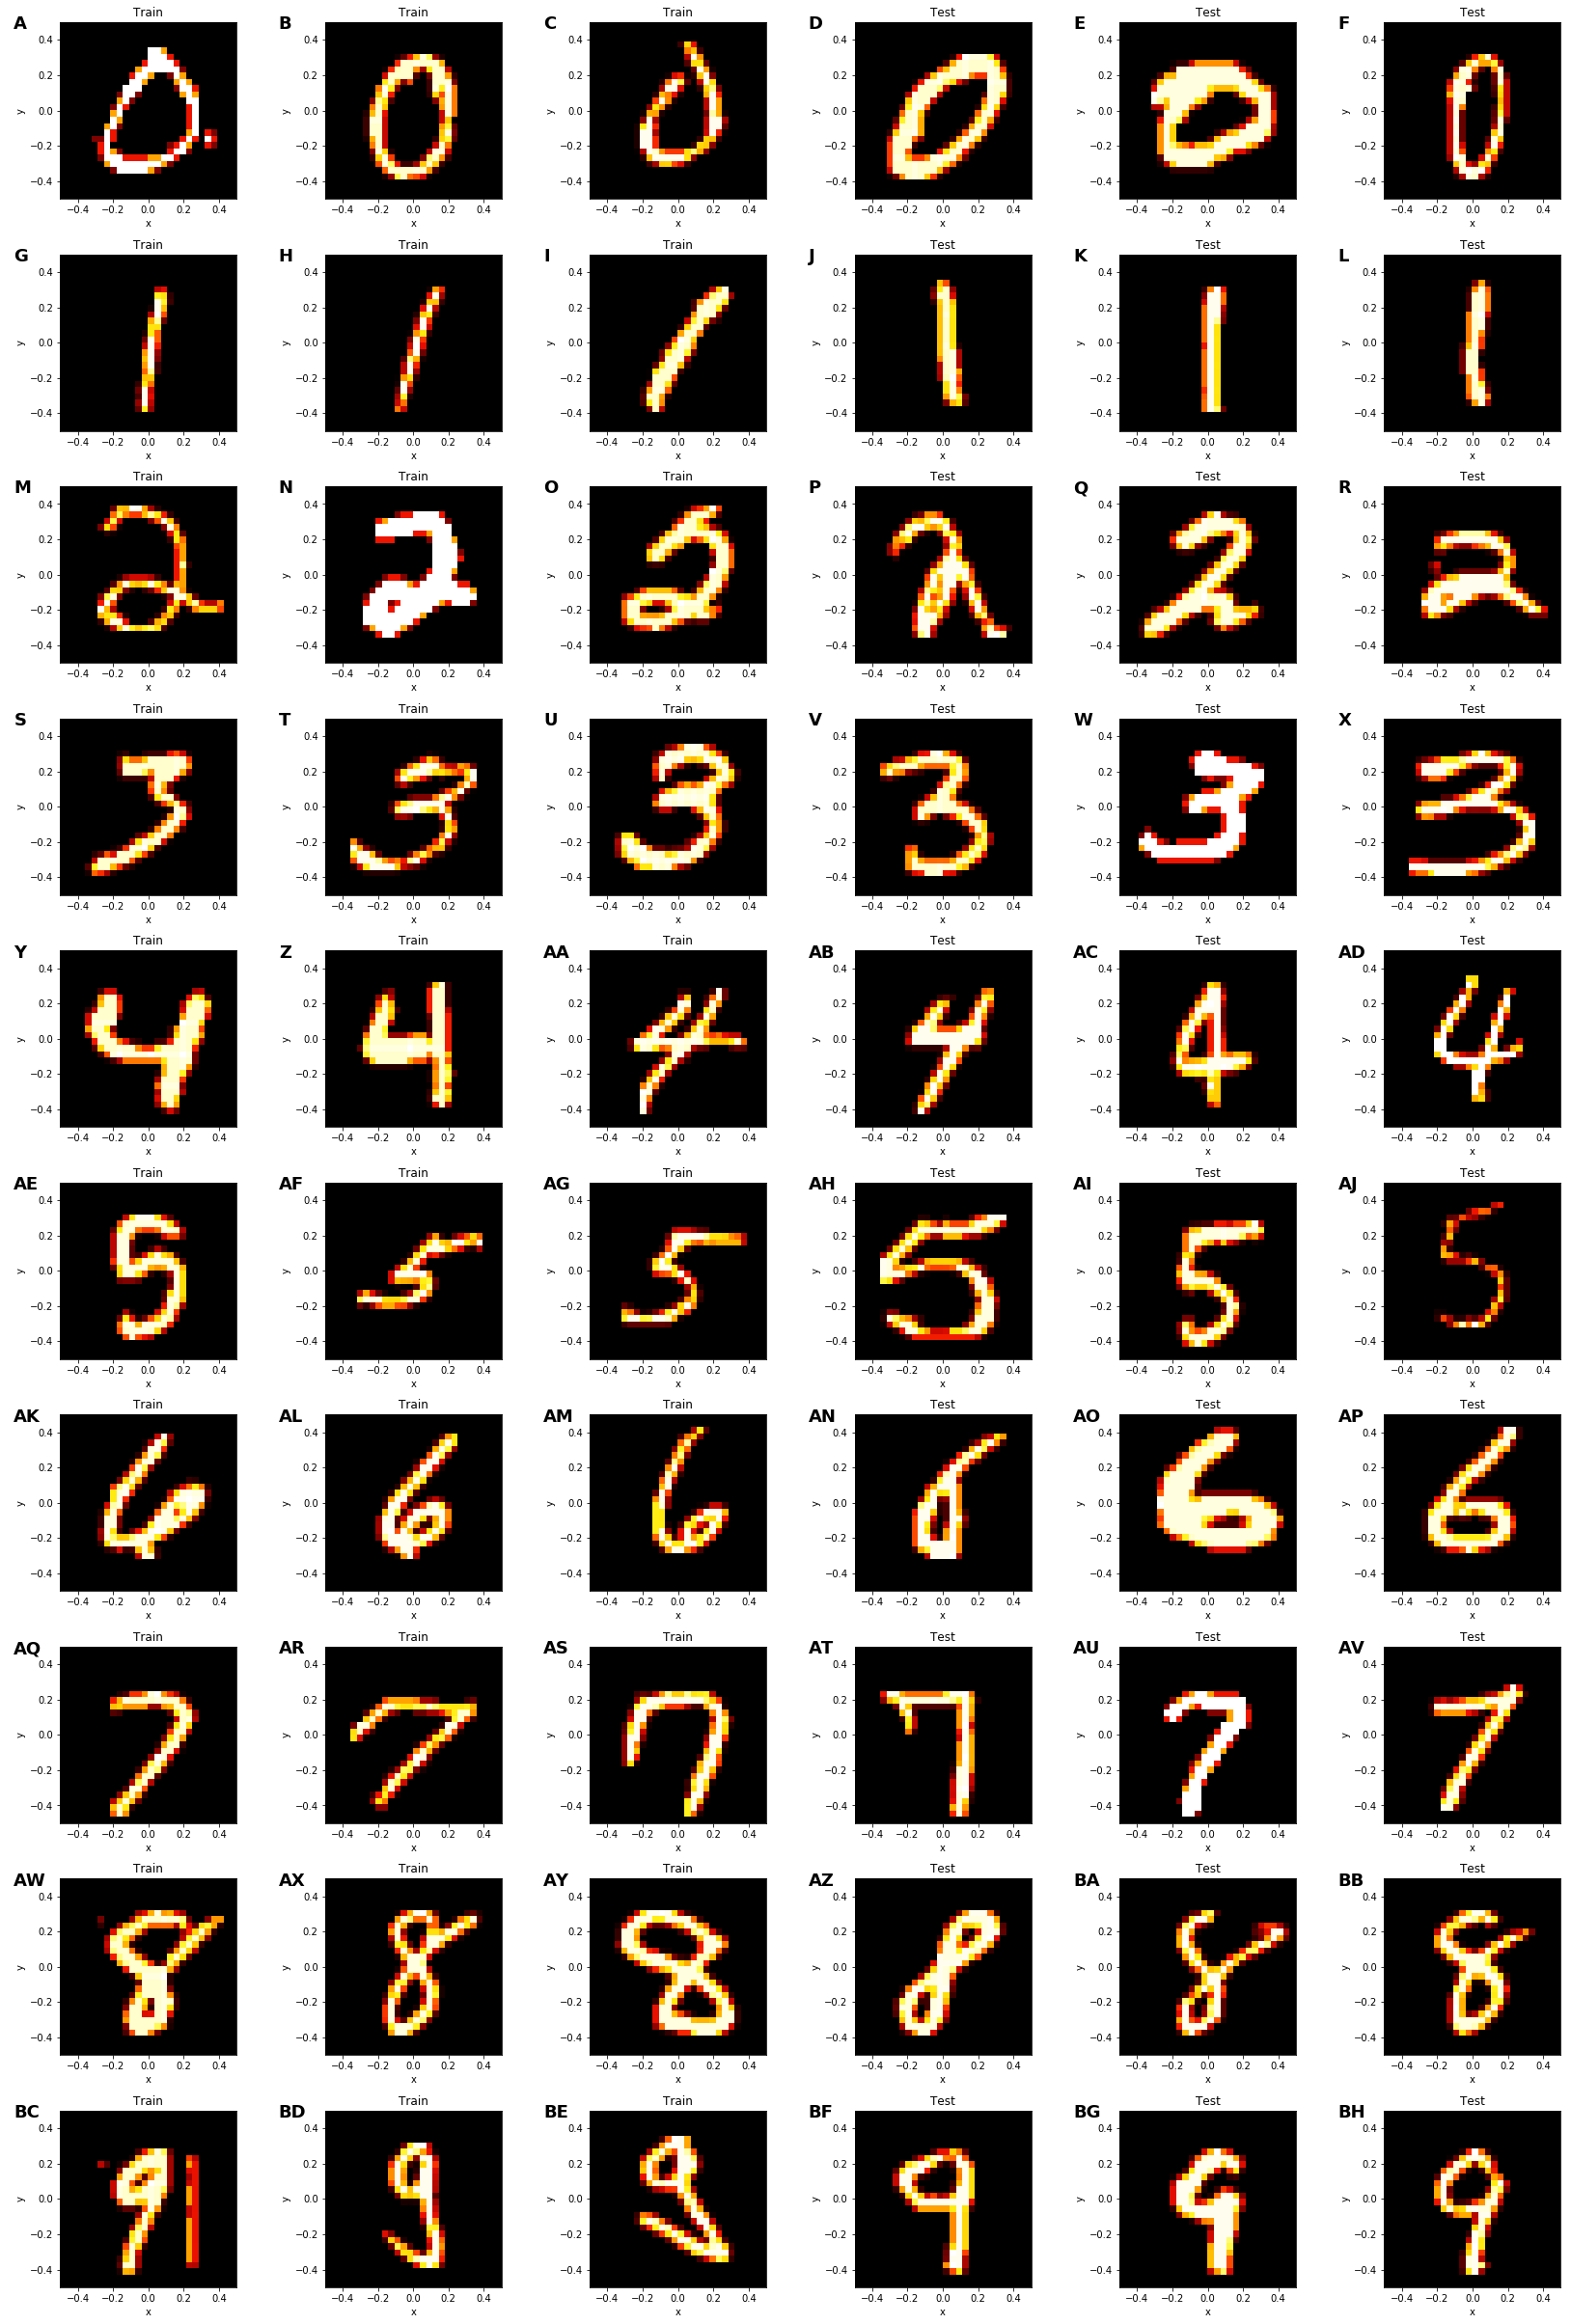

In [19]:
nums=list(range(0,10))
index_list_train=[]
# Take 3 sample randomly for each digit in train and test
for i in nums:  
  index_list_train.append(sample(list(np.where(y_train ==i)[0]),3))

index_list_test=[]
for i in nums:  
  index_list_test.append(sample(list(np.where(y_test ==i)[0]),3))  


train_test_ind=[]
for i in range(0,10):
  a=[]
  for item in index_list_train[i]:
    a.append(hv.Image(X_train[item],label="Train"))
  b=[]
  for item in index_list_test[i]:
    b.append(hv.Image(X_test[item],label="Test"))
  train_test_ind.append(a+b)

train_test_ind_flat=[item for sublist in train_test_ind for item in sublist]

img=train_test_ind_flat[0]
for i in range(1,len(train_test_ind_flat)):
  img=img+train_test_ind_flat[i]
  
img.cols(6) # A very cool way to plot grids of images. Very complex code to do the same in matplotlib

## Reshape the data to have images of size 28X 28 with 1 channel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Conver the datatype and normalize the images

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Convert 1-dimensional class of digits to 10 dimentional where the position with digit will be 1 and zero everywhere else

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## y_train after dimentional change

In [23]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Network with 70,000 parameters and 98.23% accuracy. Not a great network

### Network Design 1 

In [24]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

W0804 14:16:32.761534 140111298627456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0804 14:16:32.813258 140111298627456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:16:32.819795 140111298627456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### Check the model summary

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


### Define Optimizer function

In [26]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0804 14:17:19.294748 140111298627456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 14:17:19.324473 140111298627456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Train the network

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0804 14:17:25.946356 140111298627456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 14:17:26.002500 140111298627456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.1931 - acc: 0.9446
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0727 - acc: 0.9774
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0534 - acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0428 - acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0330 - acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0276 - acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0230 - acc: 0.9924
Epoch 8/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0179 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0147 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0123 - 

### Print the validation score

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.07567873232191741, 0.9823]


## Network Design 2. 5000 Parameters with 98.7% Validation Accuracy

In [34]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(5, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(5, 1, activation='relu'))
model.add(Convolution2D(5, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 24, 24, 10)        460       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 12, 12, 5)         55        
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 10, 10, 5)         230       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 10)          460       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 6, 6, 10)          910       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/loc

### Define the loss function/optimizer

In [37]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0404 - acc: 0.9872
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0388 - acc: 0.9875
Epoch 3/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0362 - acc: 0.9882
Epoch 4/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0341 - acc: 0.9892
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0322 - acc: 0.9896
Epoch 6/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0321 - acc: 0.9896
Epoch 7/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0302 - acc: 0.9898
Epoch 8/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0285 - acc: 0.9909
Epoch 9/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0279 - acc: 0.9909
Epoch 10/20
60000/60000 [==============================] - 11s 178us/step - loss: 

### Check the validation score

In [38]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.056274942871784694, 0.9876]


## Network Design 3. 24000 Parameters with 99.17 Validation Accuracy

In [99]:
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# # model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_301 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 11, 11, 8)         200       
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 7, 7, 24)          3480      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':

### Define the loss/Optimizer function

In [100]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=100, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.2715 - acc: 0.9176
Epoch 2/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0686 - acc: 0.9793
Epoch 3/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.0516 - acc: 0.9841
Epoch 4/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0418 - acc: 0.9869
Epoch 5/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0345 - acc: 0.9894
Epoch 6/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.0287 - acc: 0.9909
Epoch 7/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0254 - acc: 0.9922
Epoch 8/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0228 - acc: 0.9925
Epoch 9/30
60000/60000 [==============================] - 5s 76us/step - loss: 0.0203 - acc: 0.9935
Epoch 10/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0177 - acc: 0.994

### Print the validation score

In [101]:
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test,verbose=0)
print("Train Score: {} Test score: {}".format(score_train,score_test))

Train Score: [0.005445570188108521, 0.9982333333333333] Test score: [0.04495789147009887, 0.9917]


## Network Deisgn 4: 40,000 Parameters and 99.29% Validation Accuracy

In [104]:
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# # model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_326 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_327 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_328 (Conv2D)          (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_329 (Conv2D)          (None, 11, 11, 8)         200       
_________________________________________________________________
conv2d_330 (Conv2D)          (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_331 (Conv2D)          (None, 7, 7, 24)          3480      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':

### Define the loss function

In [105]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=100, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/30
60000/60000 [==============================] - 9s 150us/step - loss: 0.3154 - acc: 0.8993
Epoch 2/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.0767 - acc: 0.9763
Epoch 3/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.0536 - acc: 0.9827
Epoch 4/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0425 - acc: 0.9866
Epoch 5/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.0361 - acc: 0.9882
Epoch 6/30
60000/60000 [==============================] - 5s 84us/step - loss: 0.0305 - acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 5s 84us/step - loss: 0.0273 - acc: 0.9913
Epoch 8/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.0232 - acc: 0.9924
Epoch 9/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.0212 - acc: 0.9931
Epoch 10/30
60000/60000 [==============================] - 5s 84us/step - loss: 0.0194 - acc: 0.993

### Print the validation Accuracy

In [106]:
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test,verbose=0)
print("Train Score: {} Test score: {}".format(score_train,score_test))

Train Score: [0.001221236837824578, 0.9997166666666667] Test score: [0.029364099923595812, 0.9929]


## Network Design 5

In [63]:
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 12, 12, 16)        272       
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 10, 10, 24)        3480      
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 8, 8, 32)          6944      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 32)          0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [64]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=100, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.3151 - acc: 0.8999
Epoch 2/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0806 - acc: 0.9751
Epoch 3/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0596 - acc: 0.9810
Epoch 4/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0486 - acc: 0.9850
Epoch 5/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0414 - acc: 0.9871
Epoch 6/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0365 - acc: 0.9887
Epoch 7/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0323 - acc: 0.9900
Epoch 8/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0295 - acc: 0.9907
Epoch 9/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0272 - acc: 0.9914
Epoch 10/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.0234 - acc: 0.9930

In [66]:
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test,verbose=0)
print("Train Score: {} Test score: {}".format(score_train,score_test))

Train Score: [0.005986161768271601, 0.9980666666666667] Test score: [0.0450400634635298, 0.9902]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [75]:
layer_dict

{'activation_13': <keras.layers.core.Activation at 0x7f6d6145df28>,
 'conv2d_149': <keras.layers.convolutional.Conv2D at 0x7f6d614c6400>,
 'conv2d_150': <keras.layers.convolutional.Conv2D at 0x7f6d614c6470>,
 'conv2d_151': <keras.layers.convolutional.Conv2D at 0x7f6d614c6780>,
 'conv2d_152': <keras.layers.convolutional.Conv2D at 0x7f6d614c67b8>,
 'conv2d_153': <keras.layers.convolutional.Conv2D at 0x7f6d614f47f0>,
 'conv2d_154': <keras.layers.convolutional.Conv2D at 0x7f6d61487d68>,
 'conv2d_155': <keras.layers.convolutional.Conv2D at 0x7f6d614b65f8>,
 'flatten_13': <keras.layers.core.Flatten at 0x7f6d6145dba8>,
 'max_pooling2d_37': <keras.layers.pooling.MaxPooling2D at 0x7f6d614f4438>,
 'max_pooling2d_38': <keras.layers.pooling.MaxPooling2D at 0x7f6d614b6240>}

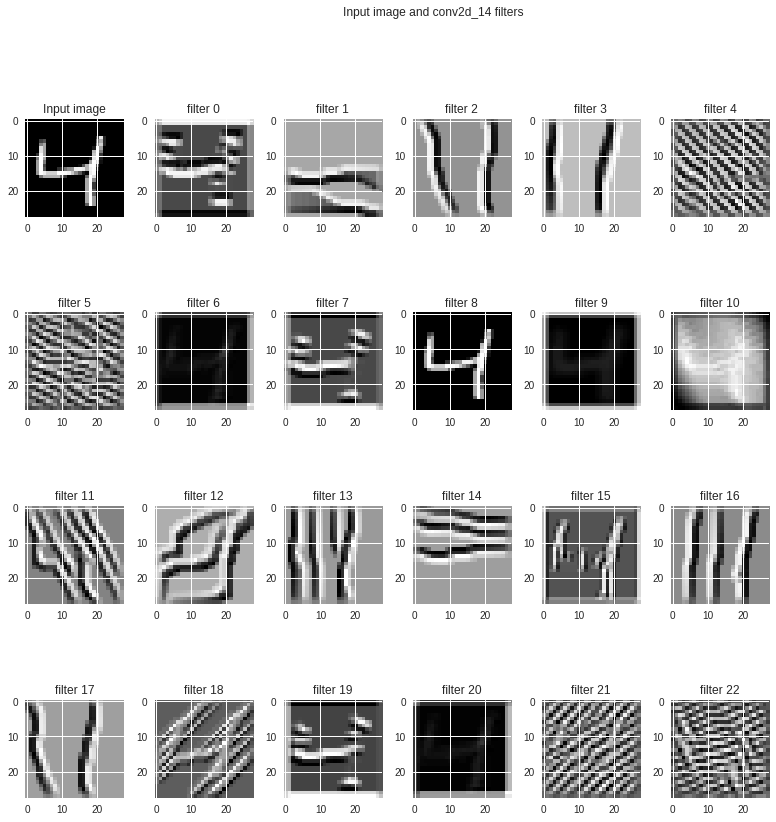

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()